# Benchmark of satlas2 speed

The simultaneous fit of sets of data is shown in this notebook. The data generation code can be replaced by code that reads in datafiles, so this script can serve as the basis for your own analysis.

First, start with an import of all the relevant libraries:

In [1]:
import sys
import time

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '..\src')

import satlas2
import satlas as sat


Define a modified root function to handle uncertainties of 0 counts in a Poisson statistic

In [2]:
def modifiedSqrt(input):
    output = np.sqrt(input)
    output[input <= 0] = 1
    return output

Define all the parameters and, in a for-loop, define the HFS and background models to generate the data from. The fitting already occurs inside the for loop, so the performance can be seen as a function of the number of datasets that are being analysed.

C:\Users\megat\Documents\git_repositories\personal\satlas2\examples\..\src\satlas2\models\hfsModel.py:284: RuntimeWarning: invalid value encountered in scalar divide
  shift = phase * n / d
C:\Users\megat\.conda\envs\satlas2\Lib\site-packages\satlas\models\hfsmodel.py:573: RuntimeWarning: invalid value encountered in divide
  D = (3*C*(C+1) - 4*I*(I+1)*J*(J+1)) / (2*I*(2*I-1)*J*(2*J-1))
C:\Users\megat\.conda\envs\satlas2\Lib\site-packages\satlas\models\hfsmodel.py:574: RuntimeWarning: invalid value encountered in divide
  E = (10*(0.5*C)**3 + 20*(0.5*C)**2 + C*(-3*I*(I+1)*J*(J+1) + I*(I+1) + J*(J+1) + 3) - 5*I*(I+1)*J*(J+1)) / (I*(I-1)*(2*I-1)*J*(J-1)*(2*J-1))


Fitting 1 datasets with chisquare (Pearson, satlas2)...
0.041 s, 73 function evaluations
Fitting 1 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting done: 98it [00:00, 100.10it/s]                            


Fitting 2 datasets with chisquare (Pearson, satlas2)...
0.102 s, 110 function evaluations
Fitting 2 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting done: 174it [00:05, 30.77it/s]                            


Fitting 3 datasets with chisquare (Pearson, satlas2)...
0.154 s, 122 function evaluations
Fitting 3 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting done: 209it [00:14, 14.83it/s]                            


Fitting 4 datasets with chisquare (Pearson, satlas2)...
0.278 s, 163 function evaluations
Fitting 4 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting in progress (516.8577280066263): 258it [00:29,  8.60it/s]


Fitting 5 datasets with chisquare (Pearson, satlas2)...
0.365 s, 169 function evaluations
Fitting 5 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting in progress (791.4835074105964): 308it [00:54,  5.90it/s] 


Fitting 6 datasets with chisquare (Pearson, satlas2)...
0.521 s, 217 function evaluations
Fitting 6 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting in progress (921.0408291264894): 393it [01:39,  3.97it/s] 


Fitting 7 datasets with chisquare (Pearson, satlas2)...
0.702 s, 244 function evaluations
Fitting 7 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting in progress (1025.7328760442326): 448it [02:34,  2.88it/s]


Fitting 8 datasets with chisquare (Pearson, satlas2)...
0.929 s, 271 function evaluations
Fitting 8 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting in progress (1116.8718639445108): 458it [03:23,  2.33it/s]


Fitting 9 datasets with chisquare (Pearson, satlas2)...
1.09 s, 298 function evaluations
Fitting 9 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting in progress (1254.023933377538): 558it [05:11,  1.77it/s] 


Fitting 10 datasets with chisquare (Pearson, satlas2)...
1.23 s, 290 function evaluations
Fitting 10 datasets with chisquare (Pearson, satlas1)...


Chisquare fitting in progress (1406.051401654012): 559it [06:16,  1.50it/s] 


Text(0, 0.5, 'Speedup factor by using satlas2')

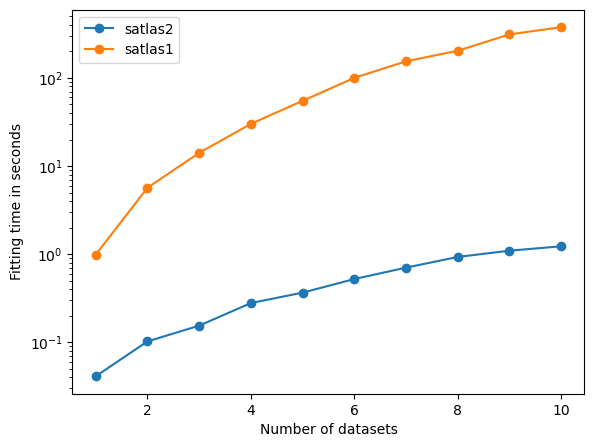

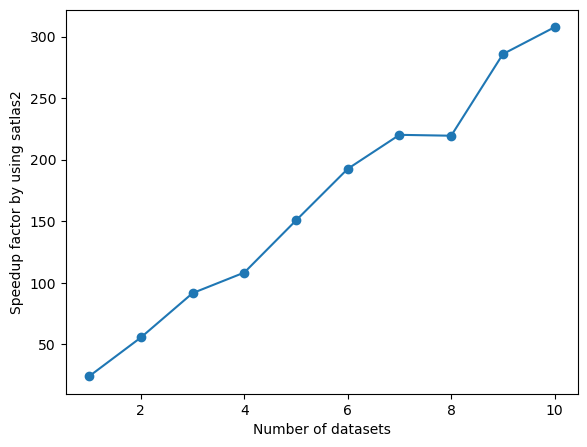

In [3]:
spin = 3.5
J = [0.5, 1.5]
A = [9600, 175]
B = [0, 315]
C = [0, 0]
FWHMG = 135
FWHML = 101
centroid = 480
bkg = 10
scale = 90

x = np.arange(-17500, -14500, 40)
x = np.hstack([x, np.arange(20000, 23000, 40)])
times = []
times_1 = []

rng = np.random.default_rng(0)
for j in range(1, 11):
    f = satlas2.Fitter()
    models = []
    X = []
    Y = []
    for i in range(j):
        hfs = satlas2.HFS(spin,
                          J,
                          A=A,
                          B=B,
                          C=C,
                          scale=scale,
                          df=centroid,
                          name='HFS1',
                          racah=True,
                          fwhmg=135,
                          fwhml=100)
        bkgm = satlas2.Polynomial([bkg], name='bkg1')
        y = hfs.f(x) + bkgm.f(x)
        y = rng.poisson(y)
        hfs.params['centroid'].value = centroid - 100
        X.append(x)
        Y.append(y)

        hfs1 = sat.HFSModel(spin,
                            J,
                            [A[0], A[1], B[0], B[1], C[0], C[1]],
                            centroid - 100, [FWHMG, FWHML],
                            scale=scale,
                            background_params=[bkg],
                            use_racah=True)
        models.append(hfs1)
        datasource = satlas2.Source(x,
                                    y,
                                    yerr=modifiedSqrt,
                                    name='Scan{}'.format(i + 1))

        datasource.addModel(hfs)
        datasource.addModel(bkgm)
        f.addSource(datasource)
    share = ['Al', 'Au', 'Bl', 'centroid', 'FWHMG', 'FWHML']
    m = sat.LinkedModel(models)
    m.shared = share
    f.shareModelParams(share)
    print('Fitting {} datasets with chisquare (Pearson, satlas2)...'.format(j))
    start = time.time()
    f.fit()
    stop = time.time()
    dt = stop - start
    print('{:.3} s, {:.0f} function evaluations'.format(dt, f.result.nfev))
    times.append(dt)
    print('Fitting {} datasets with chisquare (Pearson, satlas1)...'.format(j))
    start = time.time()
    sat.chisquare_spectroscopic_fit(m, X, Y)
    stop = time.time()
    dt = stop - start
    times_1.append(dt)


fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(range(1, len(times) + 1), times, '-o', label='satlas2')
ax.plot(range(1, len(times_1) + 1), times_1, '-o', label='satlas1')
ax.set_xlabel('Number of datasets')
ax.set_ylabel('Fitting time in seconds')
ax.set_yscale('log')
ax.legend(loc=0)

times, times_1 = np.array(times), np.array(times_1)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(range(1, len(times) + 1), times_1/times, '-o')
ax.set_xlabel('Number of datasets')
ax.set_ylabel('Speedup factor by using satlas2')

Plot the fit result, then revert the fit to show the initial starting condition of the spectrum.

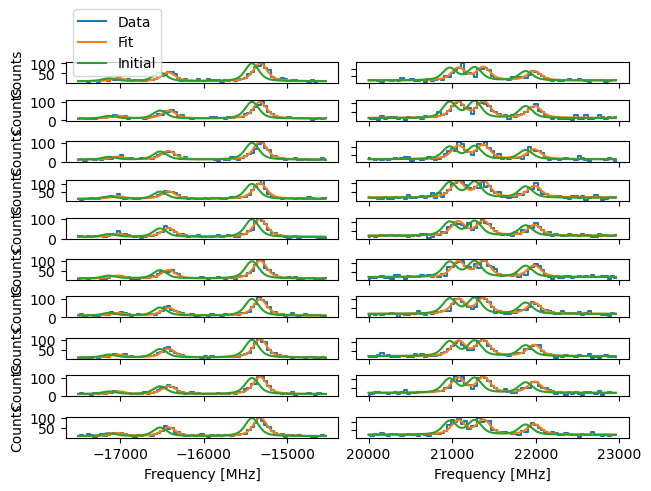

In [4]:
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(nrows=len(f.sources), ncols=2, figure=fig)
a1 = None
a2 = None
axes = []
for i, (name, datasource) in enumerate(f.sources):
    if a1 is None:
        ax1 = fig.add_subplot(gs[i, 0])
        ax2 = fig.add_subplot(gs[i, 1])
        a1 = ax1
        a2 = ax2
    else:
        ax1 = fig.add_subplot(gs[i, 0], sharex=a1)
        ax2 = fig.add_subplot(gs[i, 1], sharex=a2)
    left = datasource.x < 0
    right = datasource.x > 0
    smooth_left = np.arange(datasource.x[left].min(), datasource.x[left].max(),
                            5.0)
    smooth_right = np.arange(datasource.x[right].min(),
                             datasource.x[right].max(), 5.0)
    ax1.plot(datasource.x[left],
             datasource.y[left],
             drawstyle='steps-mid',
             label='Data')
    ax1.plot(smooth_left, datasource.evaluate(smooth_left), label='Fit')
    ax2.plot(datasource.x[right],
             datasource.y[right],
             drawstyle='steps-mid',
             label='Data')
    ax2.plot(smooth_right, datasource.evaluate(smooth_right), label='Fit')
    ax1.set_xlabel('Frequency [MHz]')
    ax2.set_xlabel('Frequency [MHz]')
    ax1.set_ylabel('Counts')
    ax2.set_ylabel('Counts')
    ax1.label_outer()
    ax2.label_outer()
    axes.append([ax1, ax2])

f.revertFit()

for i, (name, datasource) in enumerate(f.sources):
    smooth_left = np.arange(datasource.x[left].min(), datasource.x[left].max(),
                            5.0)
    smooth_right = np.arange(datasource.x[right].min(),
                             datasource.x[right].max(), 5.0)
    axes[i][0].plot(smooth_left, datasource.evaluate(smooth_left), label='Initial')
    axes[i][1].plot(smooth_right,
                    datasource.evaluate(smooth_right),
                    label='Initial')
a1.legend(loc=0)

In [5]:
print(f.reportFit())

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 290
    # data points      = 1500
    # variables        = 35
    chi-square         = 1423.58804
    reduced chi-square = 0.97173245
    Akaike info crit   = -8.42695240
    Bayesian info crit = 177.535761
[[Variables]]
    Scan1___HFS1___centroid:   481.497549 +/- 1.15593654 (0.24%) (init = 380)
    Scan1___HFS1___Al:         9600.61046 +/- 0.92670540 (0.01%) (init = 9600)
    Scan1___HFS1___Au:         174.571911 +/- 0.40166968 (0.23%) (init = 175)
    Scan1___HFS1___Bl:         0 (fixed)
    Scan1___HFS1___Bu:         316.727852 +/- 9.58185930 (3.03%) (init = 315)
    Scan1___HFS1___Cl:         0 (fixed)
    Scan1___HFS1___Cu:         0 (fixed)
    Scan1___HFS1___FWHMG:      130.719040 +/- 8.12890265 (6.22%) (init = 135)
    Scan1___HFS1___FWHML:      105.176292 +/- 7.66248618 (7.29%) (init = 100)
    Scan1___HFS1___scale:      90.9386339 +/- 3.18982406 (3.51%) (init = 90)
    Scan1___HFS1___Amp3to2:    0.

    Scan10___bkg1___p0:        10.2348292 +/- 0.39038996 (3.81%) (init = 10)
